In [44]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#warnings
import warnings
warnings.filterwarnings('ignore')


## Data Collection

In [3]:
trip_data = pd.read_csv('divvy_trip_data_2022_2023.csv')
weather_2022 = pd.read_csv('chicago 2022-01-01 to 2022-12-31.csv')
weather_2023 = pd.read_csv('chicago 2023-01-01 to 2023-12-31.csv')



/var/folders/p1/lzpy06lx2hzfdmdx0x9lcvzc0000gn/T/ipykernel_59467/919988511.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  trip_data = pd.read_csv('divvy_trip_data_2022_2023.csv')


In [4]:
trip_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.62408,41.884621,-87.627834,member


In [5]:
weather_2022.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,chicago,2022-01-01,40.9,29.6,34.8,33.4,16.7,24.3,29.7,81.7,...,0.5,0,NaN,2022-01-01T07:18:23,2022-01-01T16:30:14,0.96,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
1,chicago,2022-01-02,29.1,15.9,23.5,20.7,6.8,13.0,16.1,73.1,...,2.7,2,NaN,2022-01-02T07:18:27,2022-01-02T16:31:07,0.00,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,snow,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
2,chicago,2022-01-03,23.5,10.3,17.2,13.2,-0.2,6.9,5.7,61.3,...,5.0,3,NaN,2022-01-03T07:18:28,2022-01-03T16:32:01,0.03,Clear,Clear conditions throughout the day.,clear-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
3,chicago,2022-01-04,35.4,23.4,29.8,25.2,12.8,19.8,19.5,65.3,...,3.7,2,NaN,2022-01-04T07:18:28,2022-01-04T16:32:57,0.06,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
4,chicago,2022-01-05,34.7,13.4,19.7,24.2,-6.4,3.7,10.3,66.4,...,3.5,2,NaN,2022-01-05T07:18:25,2022-01-05T16:33:54,0.10,Overcast,Cloudy skies throughout the day.,cloudy,"72534014819,KORD,KMDW,72530094846,F1983,744665..."


In [6]:
weather_2023.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,chicago,2023-01-01,44.2,37.1,41.1,41.3,32.0,38.1,38.1,89.1,...,2.0,1,10,2023-01-01T07:18:22,2023-01-01T16:30:02,0.32,"Rain, Overcast",Cloudy skies throughout the day with early mor...,rain,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
1,chicago,2023-01-02,43.1,31.9,38.1,39.6,31.5,34.7,35.3,90.0,...,2.2,1,10,2023-01-02T07:18:26,2023-01-02T16:30:54,0.36,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,F7086,..."
2,chicago,2023-01-03,46.6,39.4,42.9,45.2,32.6,39.4,41.7,95.4,...,0.8,1,10,2023-01-03T07:18:29,2023-01-03T16:31:48,0.39,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"72534014819,KORD,KMDW,72530094846,F1983,F7086,..."
3,chicago,2023-01-04,45.1,33.5,37.0,41.3,25.4,30.8,32.2,82.7,...,0.6,0,10,2023-01-04T07:18:29,2023-01-04T16:32:44,0.42,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"72534014819,KORD,KMDW,72530094846,F1983,F7086,..."
4,chicago,2023-01-05,34.2,32.1,33.0,28.5,22.7,25.4,28.0,81.5,...,1.5,1,10,2023-01-05T07:18:26,2023-01-05T16:33:41,0.46,"Snow, Rain, Overcast",Cloudy skies throughout the day with morning r...,snow,"72534014819,KORD,KMDW,72530094846,F1983,F7086,..."


In [7]:
weather_data_22_23 = pd.concat([weather_2022, weather_2023], axis=0)

In [8]:
weather_data_22_23.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,chicago,2022-01-01,40.9,29.6,34.8,33.4,16.7,24.3,29.7,81.7,...,0.5,0,NaN,2022-01-01T07:18:23,2022-01-01T16:30:14,0.96,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
1,chicago,2022-01-02,29.1,15.9,23.5,20.7,6.8,13.0,16.1,73.1,...,2.7,2,NaN,2022-01-02T07:18:27,2022-01-02T16:31:07,0.00,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,snow,"72534014819,AP878,KORD,KMDW,72530094846,F1983,..."
2,chicago,2022-01-03,23.5,10.3,17.2,13.2,-0.2,6.9,5.7,61.3,...,5.0,3,NaN,2022-01-03T07:18:28,2022-01-03T16:32:01,0.03,Clear,Clear conditions throughout the day.,clear-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
3,chicago,2022-01-04,35.4,23.4,29.8,25.2,12.8,19.8,19.5,65.3,...,3.7,2,NaN,2022-01-04T07:18:28,2022-01-04T16:32:57,0.06,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
4,chicago,2022-01-05,34.7,13.4,19.7,24.2,-6.4,3.7,10.3,66.4,...,3.5,2,NaN,2022-01-05T07:18:25,2022-01-05T16:33:54,0.10,Overcast,Cloudy skies throughout the day.,cloudy,"72534014819,KORD,KMDW,72530094846,F1983,744665..."


<br>

### Data Cleaning

Approach 1: Data Standardization

In [9]:



# weather_22 = weather_2022.drop(columns=['name','tempmax','tempmin','feelslikemax','feelslikemin','feelslike','dew','humidity','solarenergy','uvindex','severerisk','sunrise','sunset','moonphase','description','stations', 'windgust','precip','precipprob','precipcover','preciptype','snow','snowdepth','winddir','sealevelpressure','cloudcover','solarradiation','conditions'], axis=1)
# weather_23 = weather_2023.drop(columns=['name','tempmax','tempmin','feelslikemax','feelslikemin','feelslike','dew','humidity','solarenergy','uvindex','severerisk','sunrise','sunset','moonphase','description','stations', 'windgust','precip','precipprob','precipcover','preciptype','snow','snowdepth','winddir','sealevelpressure','cloudcover','solarradiation','conditions'], axis=1)

# #temp - F, windspeed- mph, visibility-miles

# weather_data_22_23 = pd.concat([weather_22, weather_23], axis=0)

In [10]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182862 entries, 0 to 7182861
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           object 
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(3), object(10)
memory usage: 712.4+ MB


In [11]:
weather_data_22_23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 364
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              730 non-null    object 
 1   datetime          730 non-null    object 
 2   tempmax           730 non-null    float64
 3   tempmin           730 non-null    float64
 4   temp              730 non-null    float64
 5   feelslikemax      730 non-null    float64
 6   feelslikemin      730 non-null    float64
 7   feelslike         730 non-null    float64
 8   dew               730 non-null    float64
 9   humidity          730 non-null    float64
 10  precip            730 non-null    float64
 11  precipprob        730 non-null    int64  
 12  precipcover       730 non-null    float64
 13  preciptype        304 non-null    object 
 14  snow              730 non-null    float64
 15  snowdepth         730 non-null    float64
 16  windgust          729 non-null    float64
 17  wi

#### Obs for weather: 
    
1. Can observe that the date time is an object data type, so we can convert it back to date time format like yyyy-mm-dd

2. Name is also an object so we can conver it to str or category, since name is representing a city name, we can change it to category

3. Precip type is also an object but when we look at the dataset, we can notice it as string type, so we can change this to string

4. Sunrise, Sunset is also object but we should convert it to proper date time format

5. Similarly we should convet conditions to Categorical, descritpion to string, icon to categorical dtypes


#### Observation:-
1. Rideid is a object can probably convert it to str because we cannot convert every unique ride id to category

2. rideable type is a object but upon reviewing we can treat it as category

3. started at and ended it is a object but upon reviewing it is a time stamp so we can convert it to date time dtype

4. starting station name & ending is a object but we can treat station names a categories

5. Can observe that for the start station id and end station id we have mix of objects, integers and strings as dtypes so we can convert everything into one str dtype 

6. member_casual is a object upon inspection its a category so we can convert it to categorical column


In [12]:
## Making above changes

#1 Weather data

weather_data_22_23['datetime'] = pd.to_datetime(weather_data_22_23['datetime'], format='%Y-%m-%d')

weather_data_22_23['name'] = weather_data_22_23['name'].astype('category')

weather_data_22_23['preciptype'] = weather_data_22_23['preciptype'].astype(str)

weather_data_22_23['sunrise'] = pd.to_datetime(weather_data_22_23['sunrise'])

weather_data_22_23['sunset'] = pd.to_datetime(weather_data_22_23['sunset'])

weather_data_22_23['conditions'] = weather_data_22_23['conditions'].astype('category')

weather_data_22_23['icon'] = weather_data_22_23['icon'].astype('category')

weather_data_22_23['description'] = weather_data_22_23['description'].astype(str)

weather_data_22_23.info()


<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 364
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              730 non-null    category      
 1   datetime          730 non-null    datetime64[ns]
 2   tempmax           730 non-null    float64       
 3   tempmin           730 non-null    float64       
 4   temp              730 non-null    float64       
 5   feelslikemax      730 non-null    float64       
 6   feelslikemin      730 non-null    float64       
 7   feelslike         730 non-null    float64       
 8   dew               730 non-null    float64       
 9   humidity          730 non-null    float64       
 10  precip            730 non-null    float64       
 11  precipprob        730 non-null    int64         
 12  precipcover       730 non-null    float64       
 13  preciptype        730 non-null    object        
 14  snow              730 non-null 

In [13]:
#2 Trip Data

trip_data['ride_id'] = trip_data['ride_id'].astype(str)
trip_data['rideable_type'] = trip_data['rideable_type'].astype('category')
trip_data['started_at'] = pd.to_datetime(trip_data['started_at'])
trip_data['ended_at'] = pd.to_datetime(trip_data['ended_at'])
trip_data['start_station_name'] = trip_data['start_station_name'].astype('category')
trip_data['end_station_name'] = trip_data['end_station_name'].astype('category')


trip_data['start_station_id'] = trip_data['start_station_id'].astype(str)
trip_data['end_station_id'] = trip_data['end_station_id'].astype(str)

trip_data['member_casual'] = trip_data['member_casual'].astype('category')

trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182862 entries, 0 to 7182861
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    object        
 6   end_station_name    category      
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           object        
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(4), datetime64[ns](2), float64(3), object(4)
memory usage: 534.5+ MB


In [30]:
trip_data.to_csv('trip_data.csv', header=True, index=False)

Approach 2. Dealing with Null Values

In [14]:
## Since we are having big data we are removing the null values

weather_data_22_23.dropna(inplace=True)
trip_data.dropna(inplace=True)


Approach 3: Removing duplicates

In [15]:
# Removing duplcates for weather data 
weather_data_22_23.drop_duplicates(inplace=True)

In [16]:
# Removing duplcates for ride data
trip_data.drop_duplicates(inplace=True)

## Basic EDA


In [17]:
## No. of Rows and columns
trip_data.shape

(5516470, 13)

In [18]:
## No. of Rows and columns
weather_data_22_23.shape

(721, 33)

In [19]:
## understanding columns
trip_data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [20]:
## understanding columns
weather_data_22_23.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [21]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5516470 entries, 0 to 7182861
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    object        
 6   end_station_name    category      
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           object        
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(4), datetime64[ns](2), float64(3), object(4)
memory usage: 452.6+ MB


In [22]:
weather_data_22_23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 9 to 364
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              721 non-null    category      
 1   datetime          721 non-null    datetime64[ns]
 2   tempmax           721 non-null    float64       
 3   tempmin           721 non-null    float64       
 4   temp              721 non-null    float64       
 5   feelslikemax      721 non-null    float64       
 6   feelslikemin      721 non-null    float64       
 7   feelslike         721 non-null    float64       
 8   dew               721 non-null    float64       
 9   humidity          721 non-null    float64       
 10  precip            721 non-null    float64       
 11  precipprob        721 non-null    int64         
 12  precipcover       721 non-null    float64       
 13  preciptype        721 non-null    object        
 14  snow              721 non-null 

In [23]:
trip_data.describe()

,started_at,ended_at,start_lat,end_lat,end_lng
count,5516470,5516470,5.516470e+06,5.516470e+06,5.516470e+06
mean,2023-04-28 08:31:09.097810944,2023-04-28 08:46:57.574798080,4.190082e+01,4.190119e+01,-8.764506e+01
min,2022-01-01 00:00:05,2022-01-01 00:01:48,4.164850e+01,0.000000e+00,-8.784406e+01
25%,2023-02-10 17:39:44.750000128,2023-02-10 17:52:13.750000128,4.188042e+01,4.188096e+01,-8.765862e+01
50%,2023-06-17 13:35:38,2023-06-17 13:59:10,4.189634e+01,4.189662e+01,-8.764288e+01
75%,2023-08-30 17:05:08,2023-08-30 17:19:04,4.192669e+01,4.192877e+01,-8.762872e+01
max,2023-12-31 23:58:55,2024-01-01 14:20:23,4.563503e+01,4.206485e+01,0.000000e+00
std,NaN,NaN,4.321846e-02,6.155975e-02,9.479023e-02


In [24]:
weather_data_22_23.describe()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase
count,721,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,...,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721,721,721.000000
mean,2023-01-05 00:00:00.000000256,61.552427,46.498890,53.902774,59.806935,42.392926,50.909154,40.635645,63.315673,0.085594,...,1016.201664,65.467822,9.260055,77.679334,6.691678,4.270458,14.313454,2023-01-05 06:22:37.854369024,2023-01-05 18:37:34.737863936,0.481345
min,2022-01-10 00:00:00,-0.800000,-8.700000,-4.300000,-23.200000,-34.900000,-28.900000,-13.200000,31.700000,0.000000,...,994.200000,0.300000,1.700000,3.500000,0.100000,0.000000,10.000000,2022-01-10 07:17:35,2022-01-10 16:39:02,0.000000
25%,2022-07-09 00:00:00,44.800000,33.400000,38.700000,40.500000,26.200000,33.100000,28.000000,54.800000,0.000000,...,1011.600000,45.600000,9.200000,35.100000,3.000000,2.000000,10.000000,2022-07-09 05:24:10,2022-07-09 20:27:11,0.250000
50%,2023-01-05 00:00:00,62.900000,46.200000,54.200000,62.900000,42.500000,53.600000,39.900000,63.200000,0.000000,...,1015.600000,69.500000,9.900000,65.300000,5.700000,4.000000,10.000000,2023-01-05 07:18:26,2023-01-05 16:33:41,0.480000
75%,2023-07-04 00:00:00,79.500000,63.700000,71.600000,79.500000,63.700000,71.500000,56.600000,72.300000,0.040000,...,1020.600000,89.400000,9.900000,115.700000,10.000000,7.000000,10.000000,2023-07-04 05:20:48,2023-07-04 20:28:58,0.740000
max,2023-12-31 00:00:00,100.100000,83.100000,90.400000,116.900000,87.400000,102.200000,77.100000,95.400000,3.278000,...,1038.800000,100.000000,9.900000,219.400000,19.000000,10.000000,100.000000,2023-12-31 07:18:13,2023-12-31 16:29:00,0.980000
std,NaN,20.138304,18.331967,18.974934,23.346058,22.644780,22.844866,17.553325,12.298733,0.239080,...,7.074056,26.748907,1.277133,52.385633,4.529025,2.695227,14.121750,NaN,NaN,0.286889


In [25]:
trip_data.member_casual.value_counts()

member_casual
member    3609365
casual    1907105
mem             0
Name: count, dtype: int64

In [26]:
trip_data.rideable_type.value_counts()

rideable_type
classic_bike     3392457
electric_bike    2010211
docked_bike       113802
Name: count, dtype: int64

In [27]:
weather_data_22_23.icon.value_counts()

icon
partly-cloudy-day    357
rain                 230
clear-day             48
snow                  46
cloudy                40
Name: count, dtype: int64

In [28]:
## Adding some features and selecting some features which are useful for our analysis

## Going sidetrack and adding some time based features

trip_data['trip_duration'] = (trip_data['ended_at'] - trip_data['started_at']).dt.total_seconds()
trip_data['start_day'] = trip_data['started_at'].dt.day
trip_data['start_month'] = trip_data['started_at'].dt.month
trip_data['start_year'] = trip_data['started_at'].dt.year
trip_data['start_weekday'] = trip_data['started_at'].dt.weekday
trip_data['start_hour'] = trip_data['started_at'].dt.hour
trip_data['start_minute'] = trip_data['started_at'].dt.minute

trip_data['end_day'] = trip_data['ended_at'].dt.day
trip_data['end_month'] = trip_data['ended_at'].dt.month
trip_data['end_year'] = trip_data['ended_at'].dt.year
trip_data['end_weekday'] = trip_data['ended_at'].dt.weekday
trip_data['end_hour'] = trip_data['ended_at'].dt.hour
trip_data['end_minute'] = trip_data['ended_at'].dt.minute

In [29]:
weather_data_22_23['avg_temp_for_a_day'] = (weather_data_22_23['tempmax'] + weather_data_22_23['tempmin'])/2.0

weather_data_22_23.avg_temp_for_a_day

9      13.00
10     21.65
11     37.45
12     36.05
13     32.70
       ...  
360    37.35
361    40.05
362    37.55
363    32.85
364    34.65
Name: avg_temp_for_a_day, Length: 721, dtype: float64

In [30]:
weather = weather_data_22_23.drop(columns=['name','tempmax','tempmin','feelslikemax','feelslikemin','feelslike','dew','humidity','solarenergy','uvindex','severerisk','sunrise','sunset','moonphase','description','stations', 'windgust','precip','precipprob','precipcover','preciptype','snow','snowdepth','winddir','sealevelpressure','cloudcover','solarradiation','conditions'], axis=1)
## Seems like we dont require all these columns for now.


In [31]:
weather

,datetime,temp,windspeed,visibility,icon,avg_temp_for_a_day
9,2022-01-10,13.9,15.0,9.8,partly-cloudy-day,13.00
10,2022-01-11,21.2,22.0,9.9,partly-cloudy-day,21.65
11,2022-01-12,37.2,13.4,9.9,partly-cloudy-day,37.45
12,2022-01-13,37.0,11.4,9.1,cloudy,36.05
13,2022-01-14,32.9,18.2,8.5,snow,32.70
...,...,...,...,...,...,...
360,2023-12-27,38.2,16.0,9.9,partly-cloudy-day,37.35
361,2023-12-28,40.0,13.7,6.2,rain,40.05
362,2023-12-29,39.6,13.7,5.9,rain,37.55
363,2023-12-30,33.1,11.9,8.3,partly-cloudy-day,32.85


In [32]:
trip_data.loc[:, 'datetime'] = trip_data['started_at'].dt.date

In [33]:
trip_data['datetime'] = pd.to_datetime(trip_data['datetime'], format='%Y-%m-%d')

In [34]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5516470 entries, 0 to 7182861
Data columns (total 27 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    object        
 6   end_station_name    category      
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           object        
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
 13  trip_duration       float64       
 14  start_day           int32         
 15  start_month         int32         
 16  start_year          int32         
 17  start_weekday       int32         
 18  start_hour          int32         
 19  start_minute        int32         
 20  end_day

In [35]:
ride_data =  pd.merge(trip_data, weather, on='datetime', how='left')

In [36]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5516470 entries, 0 to 5516469
Data columns (total 32 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    object        
 6   end_station_name    category      
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           object        
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
 13  trip_duration       float64       
 14  start_day           int32         
 15  start_month         int32         
 16  start_year          int32         
 17  start_weekday       int32         
 18  start_hour          int32         
 19  start_minute        int32         
 20  en

In [37]:
ride_data.rideable_type.value_counts()

rideable_type
classic_bike     3392457
electric_bike    2010211
docked_bike       113802
Name: count, dtype: int64

In [38]:
rd_ = ride_data[~(ride_data.rideable_type == 'docked_bike')].copy()

In [39]:
rd_

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_year,end_weekday,end_hour,end_minute,datetime,temp,windspeed,visibility,icon,avg_temp_for_a_day
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,...,2022,3,12,2,2022-01-13,37.0,11.4,9.1,cloudy,36.05
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,...,2022,0,8,46,2022-01-10,13.9,15.0,9.8,partly-cloudy-day,13.00
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,...,2022,1,4,58,2022-01-25,8.8,14.1,9.9,clear-day,7.95
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,...,2022,1,0,33,2022-01-04,NaN,NaN,NaN,NaN,NaN
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.62408,...,2022,3,1,37,2022-01-20,13.7,15.0,9.9,partly-cloudy-day,14.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516465,F74DF9549B504A6B,electric_bike,2023-12-07 13:15:24,2023-12-07 13:17:37,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874702,-87.649804,...,2023,3,13,17,2023-12-07,44.6,16.2,9.9,partly-cloudy-day,44.30
5516466,BCDA66E761CC1029,classic_bike,2023-12-08 18:42:21,2023-12-08 18:45:56,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,...,2023,4,18,45,2023-12-08,51.0,17.7,9.9,partly-cloudy-day,51.05
5516467,D2CF330F9C266683,classic_bike,2023-12-05 14:09:11,2023-12-05 14:13:01,900 W Harrison St,13028,Racine Ave & Congress Pkwy,TA1306000025,41.874754,-87.649807,...,2023,1,14,13,2023-12-05,37.0,13.0,7.1,snow,37.65
5516468,3829A0D1E00EE970,electric_bike,2023-12-02 21:36:07,2023-12-02 21:53:45,Damen Ave & Madison St,13134,Morgan St & Lake St*,chargingstx4,41.881396,-87.674984,...,2023,5,21,53,2023-12-02,42.0,10.8,9.6,cloudy,41.95


<br>

<br>

### Dividing data into 2022 and 2023 year as We can see the pattern for year 2022 and 2023 year and suggest our findings for 2024 FY year.¶

In [40]:
ride_data_2022 = rd_[rd_['end_year'] == 2022]
ride_data_2023 = rd_[rd_['end_year'] == 2023]
 


In [41]:
## Dividing Data in 2022 year with respect to member,casual

member_2022 = ride_data_2022[ride_data_2022.member_casual == 'member']
casual_2022 = ride_data_2022[ride_data_2022.member_casual == 'casual']
member_2023 = ride_data_2023[ride_data_2023.member_casual == 'member']
casual_2023 = ride_data_2023[ride_data_2023.member_casual == 'casual']


### Lets Do Descriptive Analytics with keeping objective in mind. (Check patterns of Member Vs Casual) for years 2022, 2023

#### 1. DA: Counts

In [42]:
member_2022.shape, casual_2022.shape, member_2023.shape, casual_2023.shape

((809226, 32), (337580, 32), (2800130, 32), (1455703, 32))

#### 2022 VS 2023:
#### Findings 1:
    -22-  There were more trips by members when compared to casual people, Approx 34% more than casuals.
    -23-  Members constitute approximately 36% more trips than casuals in the given data

((809226, 32), (337580, 32), (2800130, 32), (1455703, 32))

#### 2. DA: What rideable type was more for members and casuals in 2022 & 2023 year?

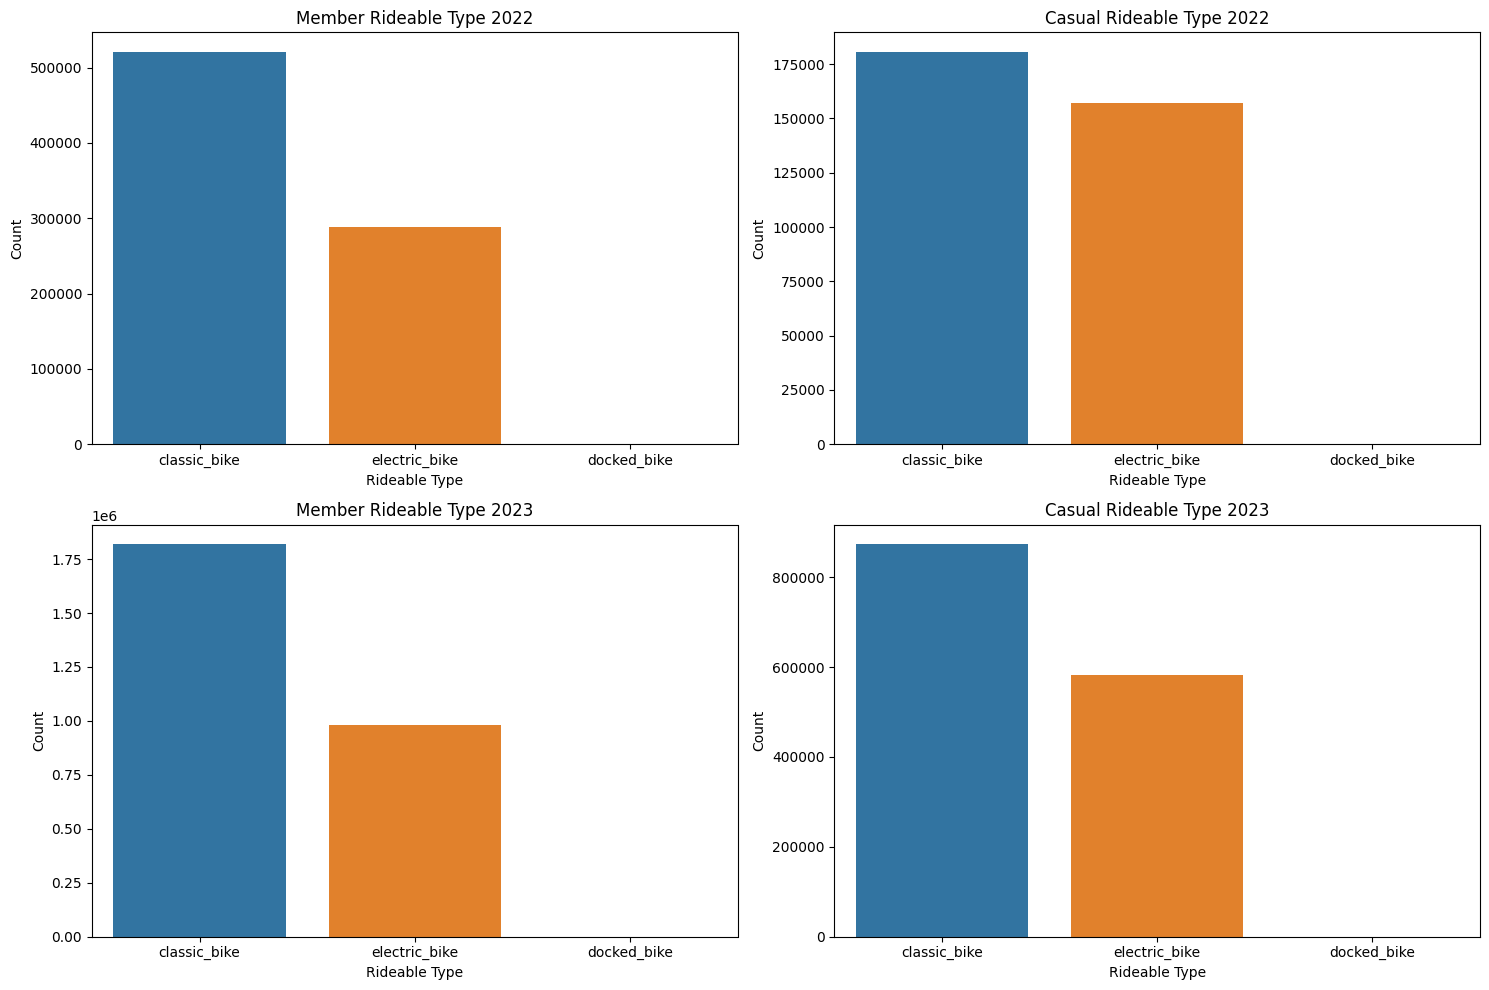

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt


# Creating plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Member 2022
sns.countplot(x='rideable_type', data=member_2022, ax=axs[0, 0], order=member_2022['rideable_type'].value_counts().index)
axs[0, 0].set_title('Member Rideable Type 2022')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_xlabel('Rideable Type')

# Casual 2022
sns.countplot(x='rideable_type', data=casual_2022, ax=axs[0, 1], order=casual_2022['rideable_type'].value_counts().index)
axs[0, 1].set_title('Casual Rideable Type 2022')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_xlabel('Rideable Type')

# Member 2023
sns.countplot(x='rideable_type', data=member_2023, ax=axs[1, 0], order=member_2023['rideable_type'].value_counts().index)
axs[1, 0].set_title('Member Rideable Type 2023')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_xlabel('Rideable Type')

# Casual 2023
sns.countplot(x='rideable_type', data=casual_2023, ax=axs[1, 1], order=casual_2023['rideable_type'].value_counts().index)
axs[1, 1].set_title('Casual Rideable Type 2023')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_xlabel('Rideable Type')

plt.tight_layout()
plt.show()


## 2022 VS 2023:
### Findings 2:
    -22 & 23 -  Members showed equal interest in electric and classic bikes
    -22 & 23 -  Casual riders showed their inclination towards electric bikes by 47% and 22% (Avg 34.33% ) than classic bikes

### 3. DA: How does trip duration looks like members and casuals in 2022 & 2023 year? 


In [54]:
member_2022['trip_duration'] = member_2022['trip_duration'] / 60
casual_2022['trip_duration'] = casual_2022['trip_duration'] / 60
member_2023['trip_duration'] = member_2023['trip_duration'] / 60
casual_2023['trip_duration'] = casual_2023['trip_duration'] / 60


In [55]:
member_2022['trip_duration'].mean(),  casual_2022['trip_duration'].mean() , member_2023['trip_duration'].mean(), casual_2023['trip_duration'].mean()

(11.677182126295166, 19.61467696546003, 12.130703080452207, 21.311094948626195)

## 2022 VS 2023:
### Findings 3:
>  -22& 23 -  Members showed equal avg ride time

>  -22& 23 -  Casual riders have a higher ride time than members 78 & 73 (76)% more

### 4. DA How does weekend and non-weekend engagement looks like?

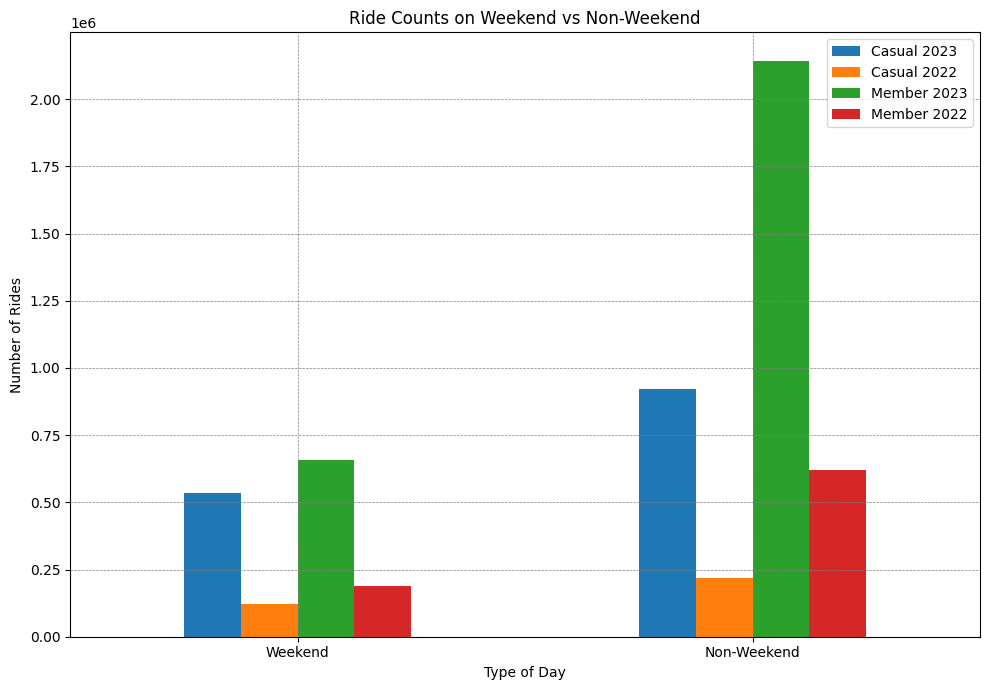

In [124]:

def calculate_weekend_counts(df):
    weekend_rides = df[df['start_weekday'] >= 5].shape[0]
    non_weekend_rides = df[df['start_weekday'] < 5].shape[0]
    return weekend_rides, non_weekend_rides

# Calculate weekend and non-weekend counts for each DataFrame
casual_2023_weekend, casual_2023_non_weekend = calculate_weekend_counts(casual_2023)
casual_2022_weekend, casual_2022_non_weekend = calculate_weekend_counts(casual_2022)
member_2023_weekend, member_2023_non_weekend = calculate_weekend_counts(member_2023)
member_2022_weekend, member_2022_non_weekend = calculate_weekend_counts(member_2022)

# Data for plotting
data = {
    'Casual 2023': [casual_2023_weekend, casual_2023_non_weekend],
    'Casual 2022': [casual_2022_weekend, casual_2022_non_weekend],
    'Member 2023': [member_2023_weekend, member_2023_non_weekend],
    'Member 2022': [member_2022_weekend, member_2022_non_weekend]
}

# Convert data into a DataFrame for easier plotting
counts_df = pd.DataFrame(data, index=['Weekend', 'Non-Weekend'])

# Plot
counts_df.plot(kind='bar', figsize=(10, 7))

# Customization
plt.title('Ride Counts on Weekend vs Non-Weekend')
plt.ylabel('Number of Rides')
plt.xlabel('Type of Day')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally
plt.tight_layout()  # Adjust layout to fit all labels, titles, etc.
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
plt.show()  # Display the plot



## 2022 VS 2023:
### Findings 4:
   > -22&23- When it comes to weekends we have equal engagement of rides for casuals and members, Unlike on non-weekends casual riders tends to have  less rides (53% less) than member rides


### 5. DA: How does top 20 start stations looks like for casual and member riders?

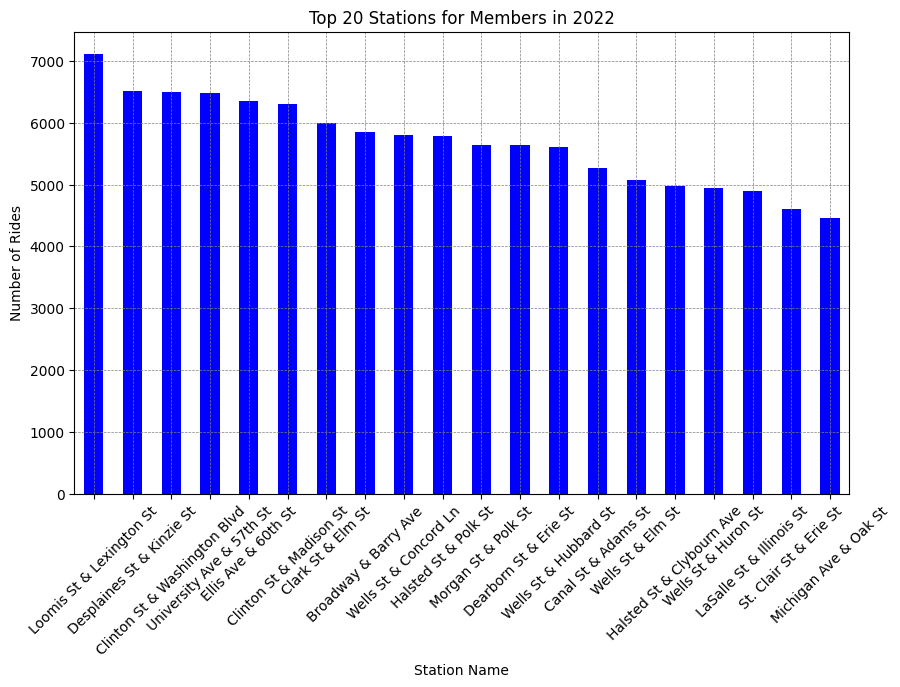

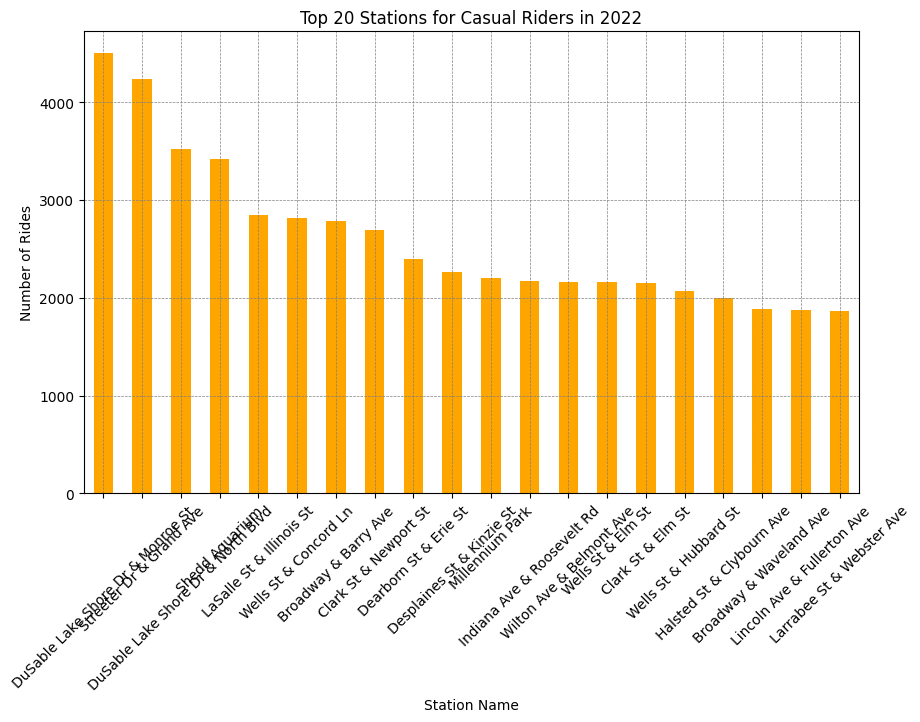

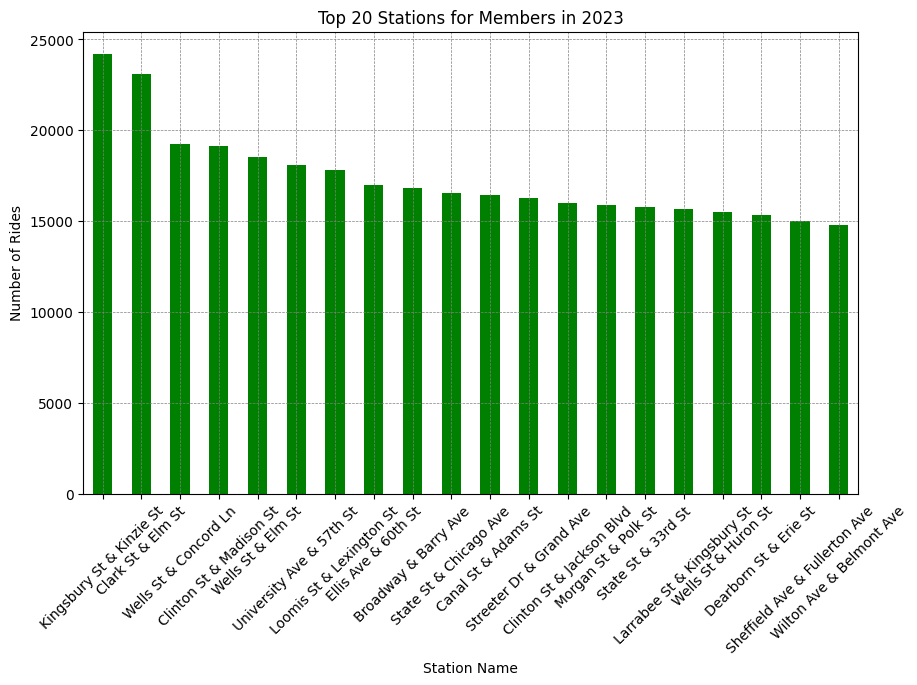

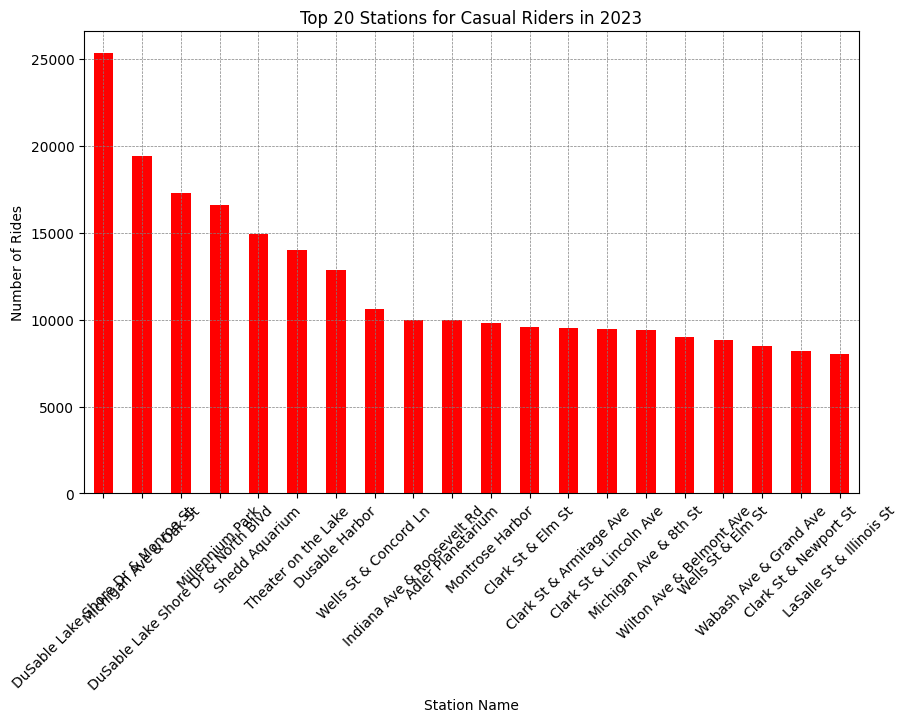

In [123]:

# Define a function to calculate the top 10 stations
def top_10_stations(value_counts_series):
    # Return the top 10 stations
    return value_counts_series.head(20)


# Calculate the top 10 stations for each user type and year
top_member_2022_stations = top_10_stations(member_2022['start_station_name'].value_counts()[1:])
top_casual_2022_stations = top_10_stations(casual_2022['start_station_name'].value_counts()[1:])
top_member_2023_stations = top_10_stations(member_2023['start_station_name'].value_counts()[1:])
top_casual_2023_stations = top_10_stations(casual_2023['start_station_name'].value_counts()[1:])

# Plotting the top 10 stations for Members in 2022
plt.figure(figsize=(10, 6))
top_member_2022_stations.plot(kind='bar', color='blue')
plt.title('Top 20 Stations for Members in 2022')
plt.ylabel('Number of Rides')
plt.xlabel('Station Name')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
plt.show()

# Plotting the top 10 stations for Casual Riders in 2022
plt.figure(figsize=(10, 6))
top_casual_2022_stations.plot(kind='bar', color='orange')
plt.title('Top 20 Stations for Casual Riders in 2022')
plt.ylabel('Number of Rides')
plt.xlabel('Station Name')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
plt.show()

# Plotting the top 10 stations for Members in 2023
plt.figure(figsize=(10, 6))
top_member_2023_stations.plot(kind='bar', color='green')
plt.title('Top 20 Stations for Members in 2023')
plt.ylabel('Number of Rides')
plt.xlabel('Station Name')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
plt.show()

# Plotting the top 10 stations for Casual Riders in 2023
plt.figure(figsize=(10, 6))
top_casual_2023_stations.plot(kind='bar', color='red')
plt.title('Top 20 Stations for Casual Riders in 2023')
plt.ylabel('Number of Rides')
plt.xlabel('Station Name')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
plt.show()


## 2022 VS 2023:
### Findings 5:
   > -22&23- When we look at the trend for top 20 start stations for casual riders and members, they are completely different, casual riders mostly start at different stations

### 6. DA How does weather effect daily engagement of riders for 2022 and 2023 year?

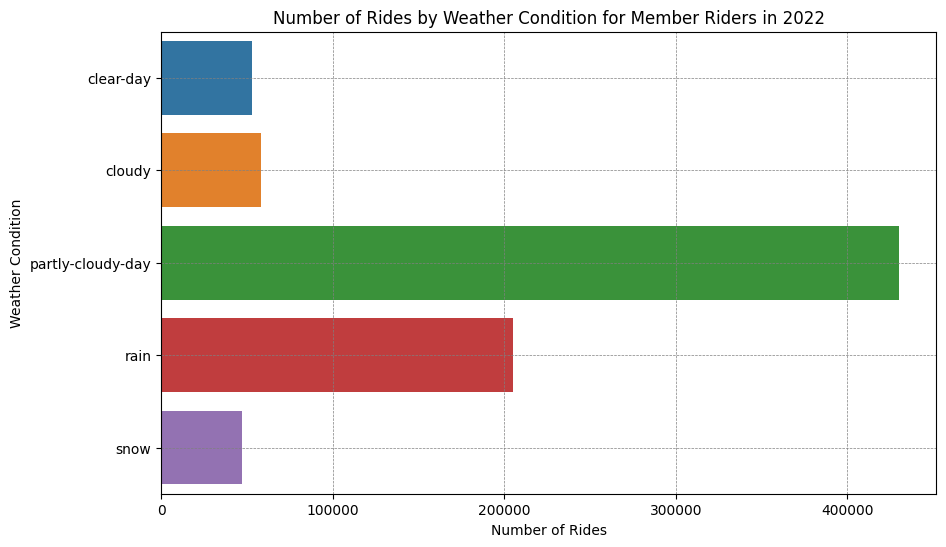

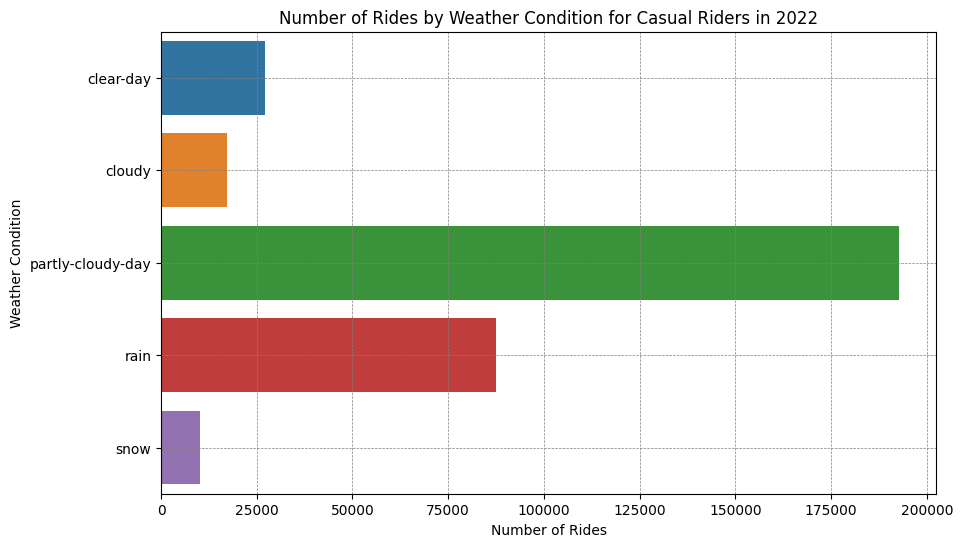

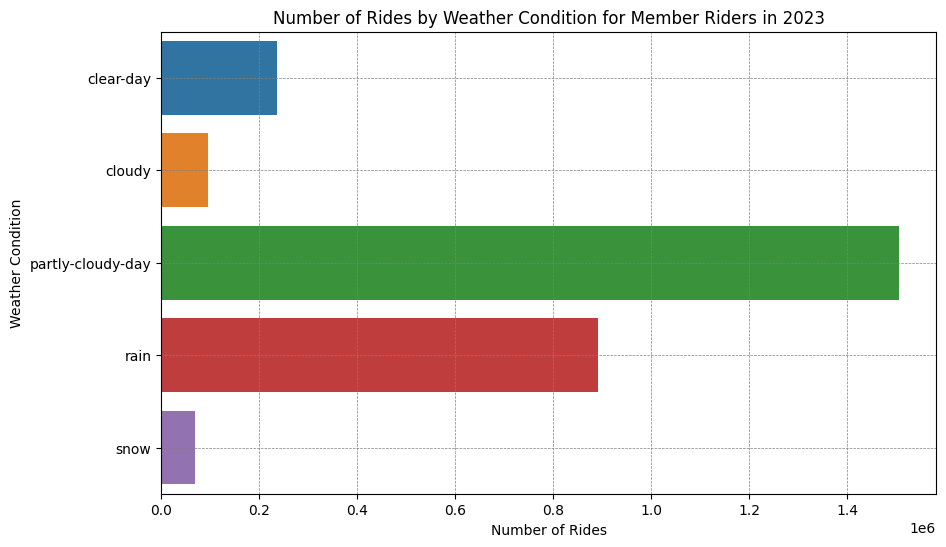

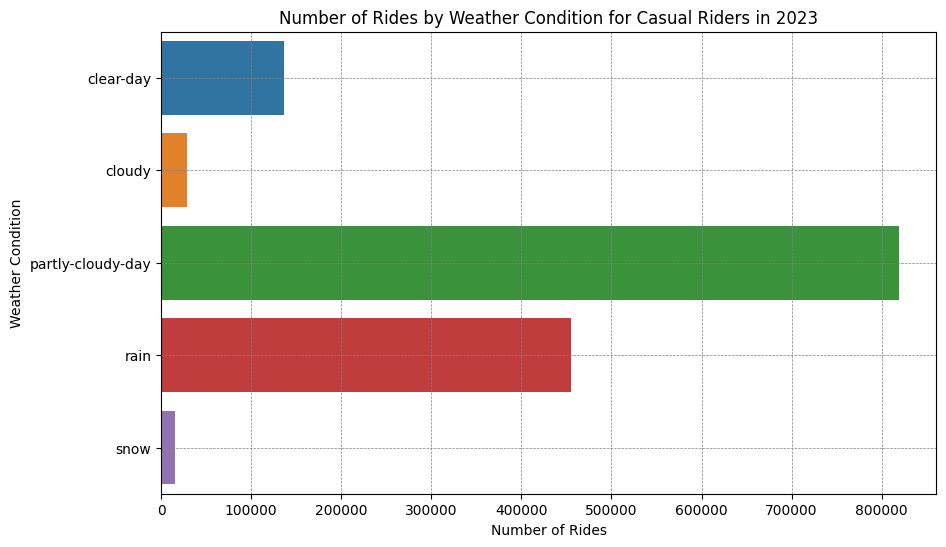

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Weather Impact Analysis
def weather_impact_analysis(df, user_type, year):
    weather_counts = df.groupby('icon')['ride_id'].count().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=weather_counts.values, y=weather_counts.index)
    plt.title(f'Number of Rides by Weather Condition for {user_type} Riders in {year}')
    plt.xlabel('Number of Rides')
    plt.ylabel('Weather Condition')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
    plt.show()

weather_impact_analysis(member_2022, 'Member', '2022')
weather_impact_analysis(casual_2022, 'Casual', '2022')
weather_impact_analysis(member_2023, 'Member', '2023')
weather_impact_analysis(casual_2023, 'Casual', '2023')

## 2022 VS 2023:
### Findings 11:
   > -22- Can notice that on a cloudy day and snow day casual members tend to go less rides than regular members
   
   > -23- Can notice same trend for the year 2023


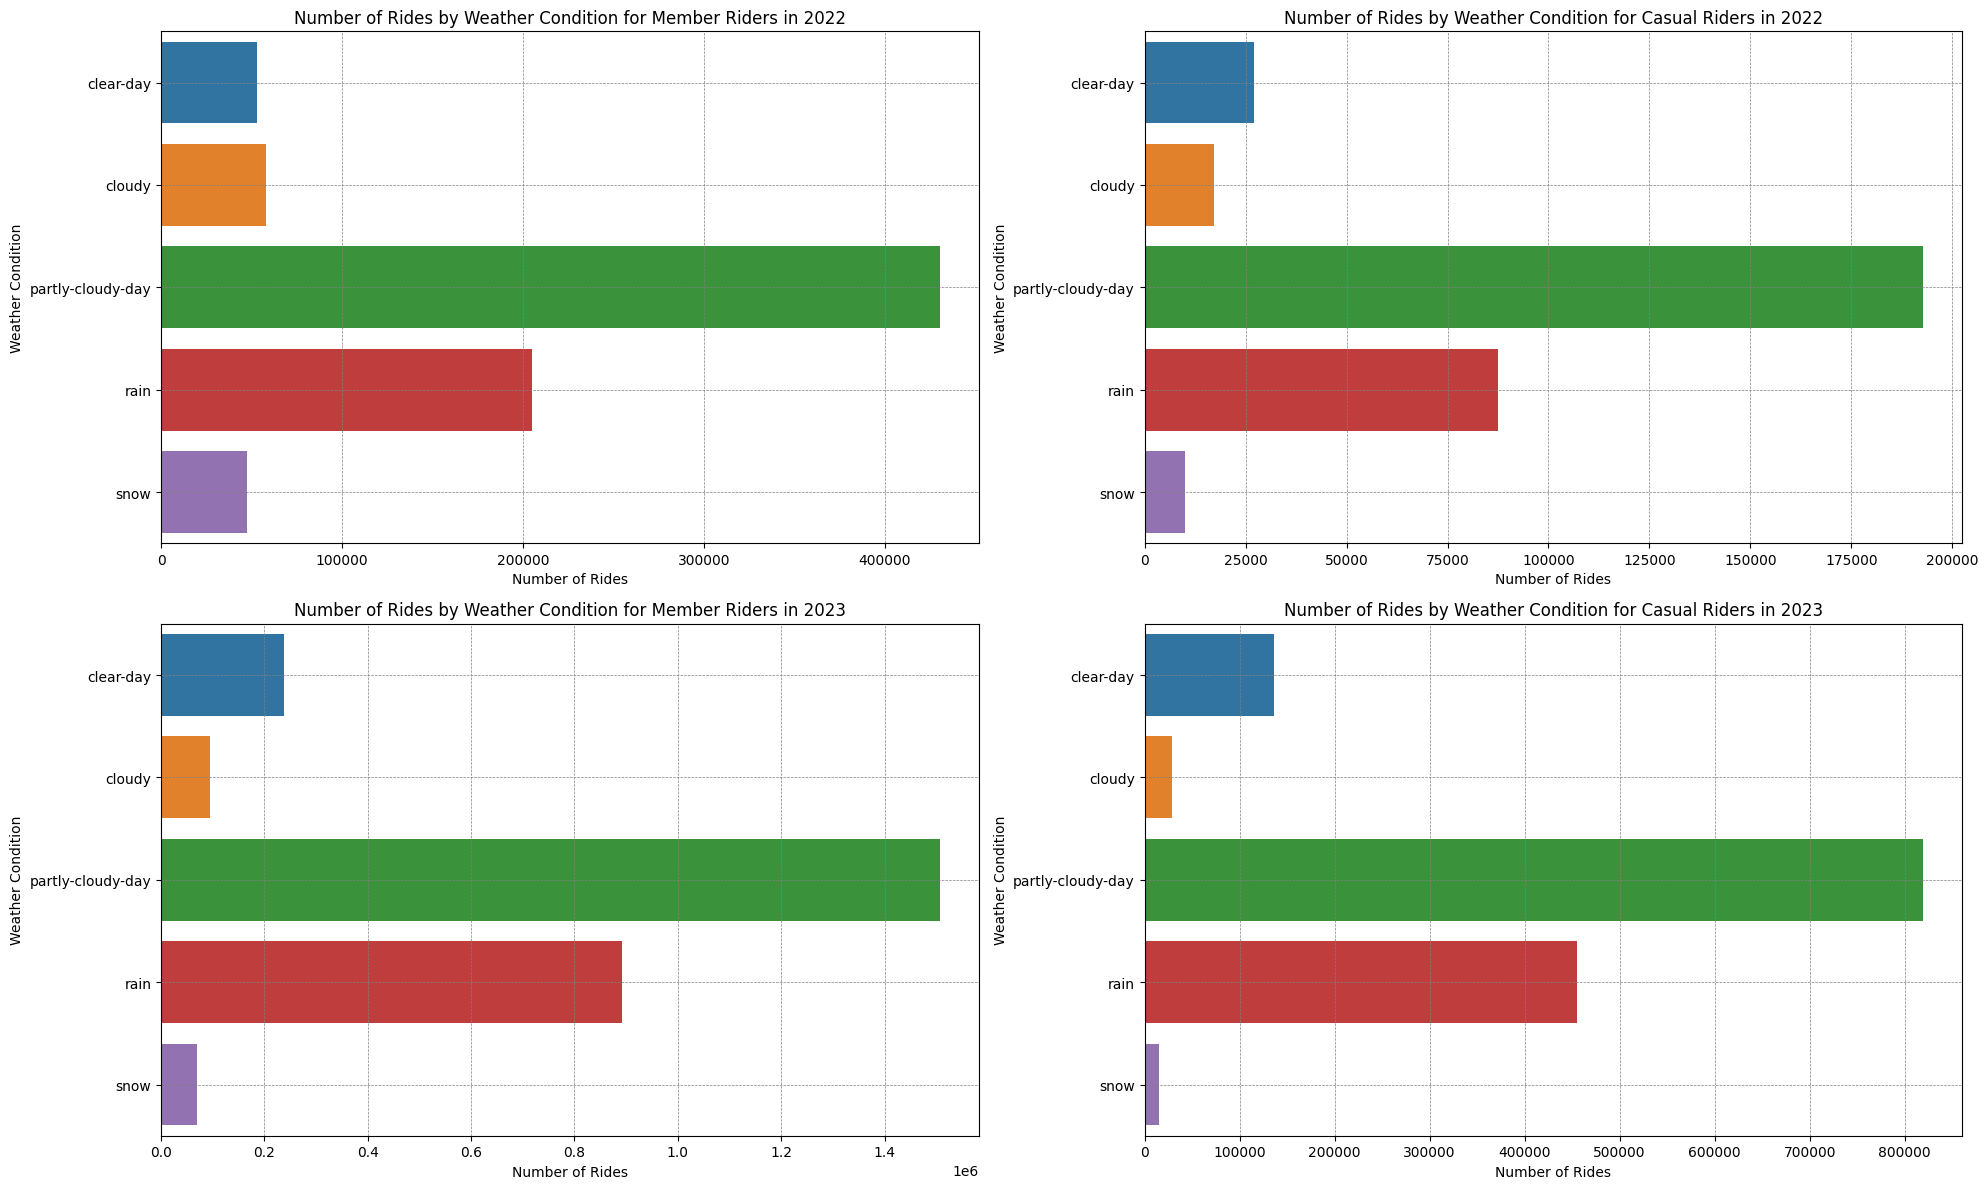

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Weather Impact Analysis
def weather_impact_analysis(dataframes, user_types, years):
    # Set up a 2x2 grid of subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
    axes = axes.flatten()  # Flatten the 2x2 grid into a 1D array of axes

    # Loop through each dataframe, user type, and year
    for ax, df, user_type, year in zip(axes, dataframes, user_types, years):
        # Group by weather condition and count rides
        weather_counts = df.groupby('icon')['ride_id'].count().sort_values(ascending=False)
        
        # Create a barplot on the specified axes
        sns.barplot(x=weather_counts.values, y=weather_counts.index, ax=ax)
        
        # Set the title and labels for each subplot
        ax.set_title(f'Number of Rides by Weather Condition for {user_type} Riders in {year}')
        ax.set_xlabel('Number of Rides')
        ax.set_ylabel('Weather Condition')
        
        # Enable grid for better readability
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Example usage assuming dataframes member_2022, casual_2022, member_2023, casual_2023 are defined and ready
dataframes = [member_2022, casual_2022, member_2023, casual_2023]
user_types = ['Member', 'Casual', 'Member', 'Casual']
years = ['2022', '2022', '2023', '2023']

weather_impact_analysis(dataframes, user_types, years)


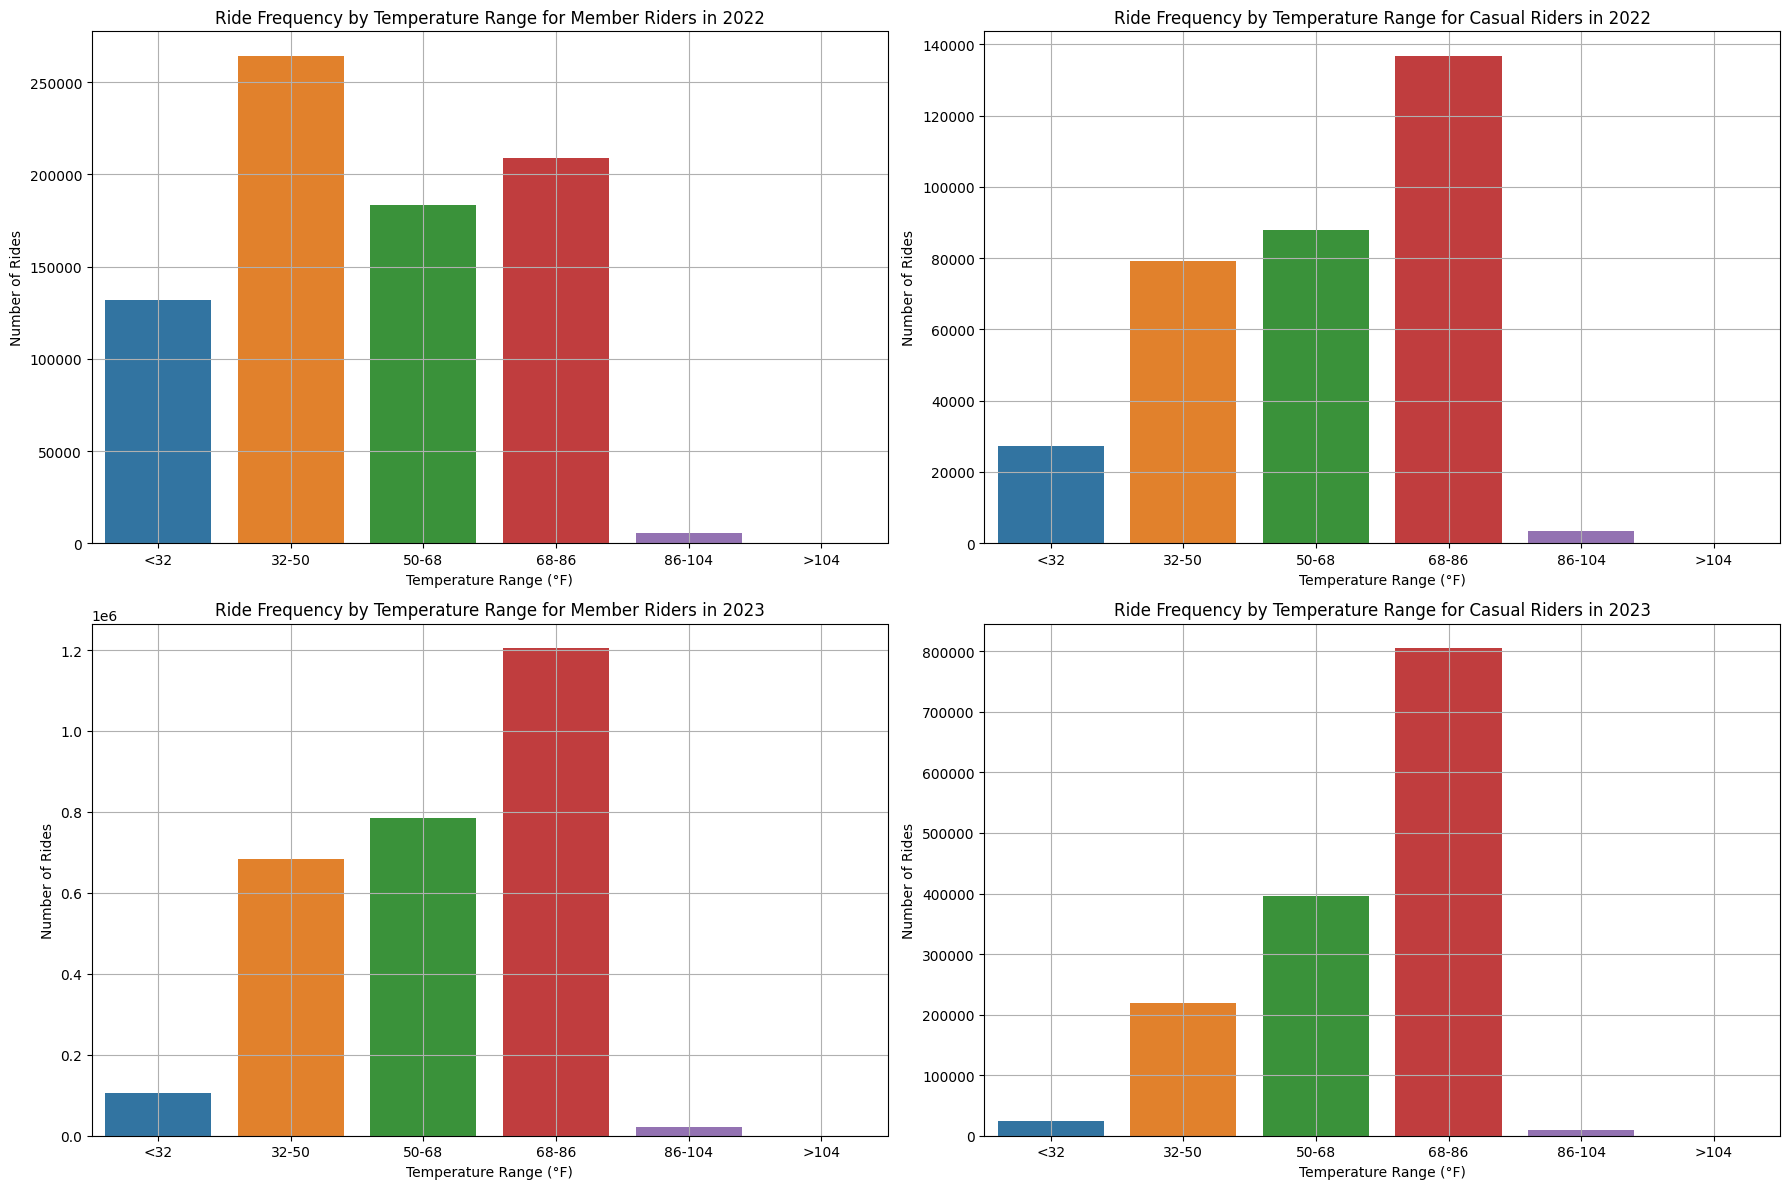

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def temperature_impact_analysis_combined(data_dict):
    # Create figure and axes for the subplots
    fig, axs = plt.subplots(2, 2, figsize=(18, 12)) # 2 rows, 2 columns
    axs = axs.flatten()  # Flatten the array to easily iterate over it

    # Loop through the dictionary of dataframes
    for idx, ((user_type, year), df) in enumerate(data_dict.items()):
        # Assuming 'temp' is in Fahrenheit, adjust the bin edges if 'temp' is in another unit
        df['temp_range'] = pd.cut(df['temp'], bins=[-10, 32, 50, 68, 86, 104, 122],
                                  labels=['<32', '32-50', '50-68', '68-86', '86-104', '>104'])
        temp_counts = df['temp_range'].value_counts().sort_index()

        # Plotting on the specified subplot axis
        sns.barplot(x=temp_counts.index, y=temp_counts.values, ax=axs[idx])
        axs[idx].set_title(f'Ride Frequency by Temperature Range for {user_type} Riders in {year}')
        axs[idx].set_xlabel('Temperature Range (°F)')
        axs[idx].set_ylabel('Number of Rides')
        axs[idx].grid(True)  # Enabling grid

    plt.tight_layout()
    plt.show()

# Example usage with a dictionary of dataframes
data_dict = {
    ('Member', '2022'): member_2022,
    ('Casual', '2022'): casual_2022,
    ('Member', '2023'): member_2023,
    ('Casual', '2023'): casual_2023
}
temperature_impact_analysis_combined(data_dict)


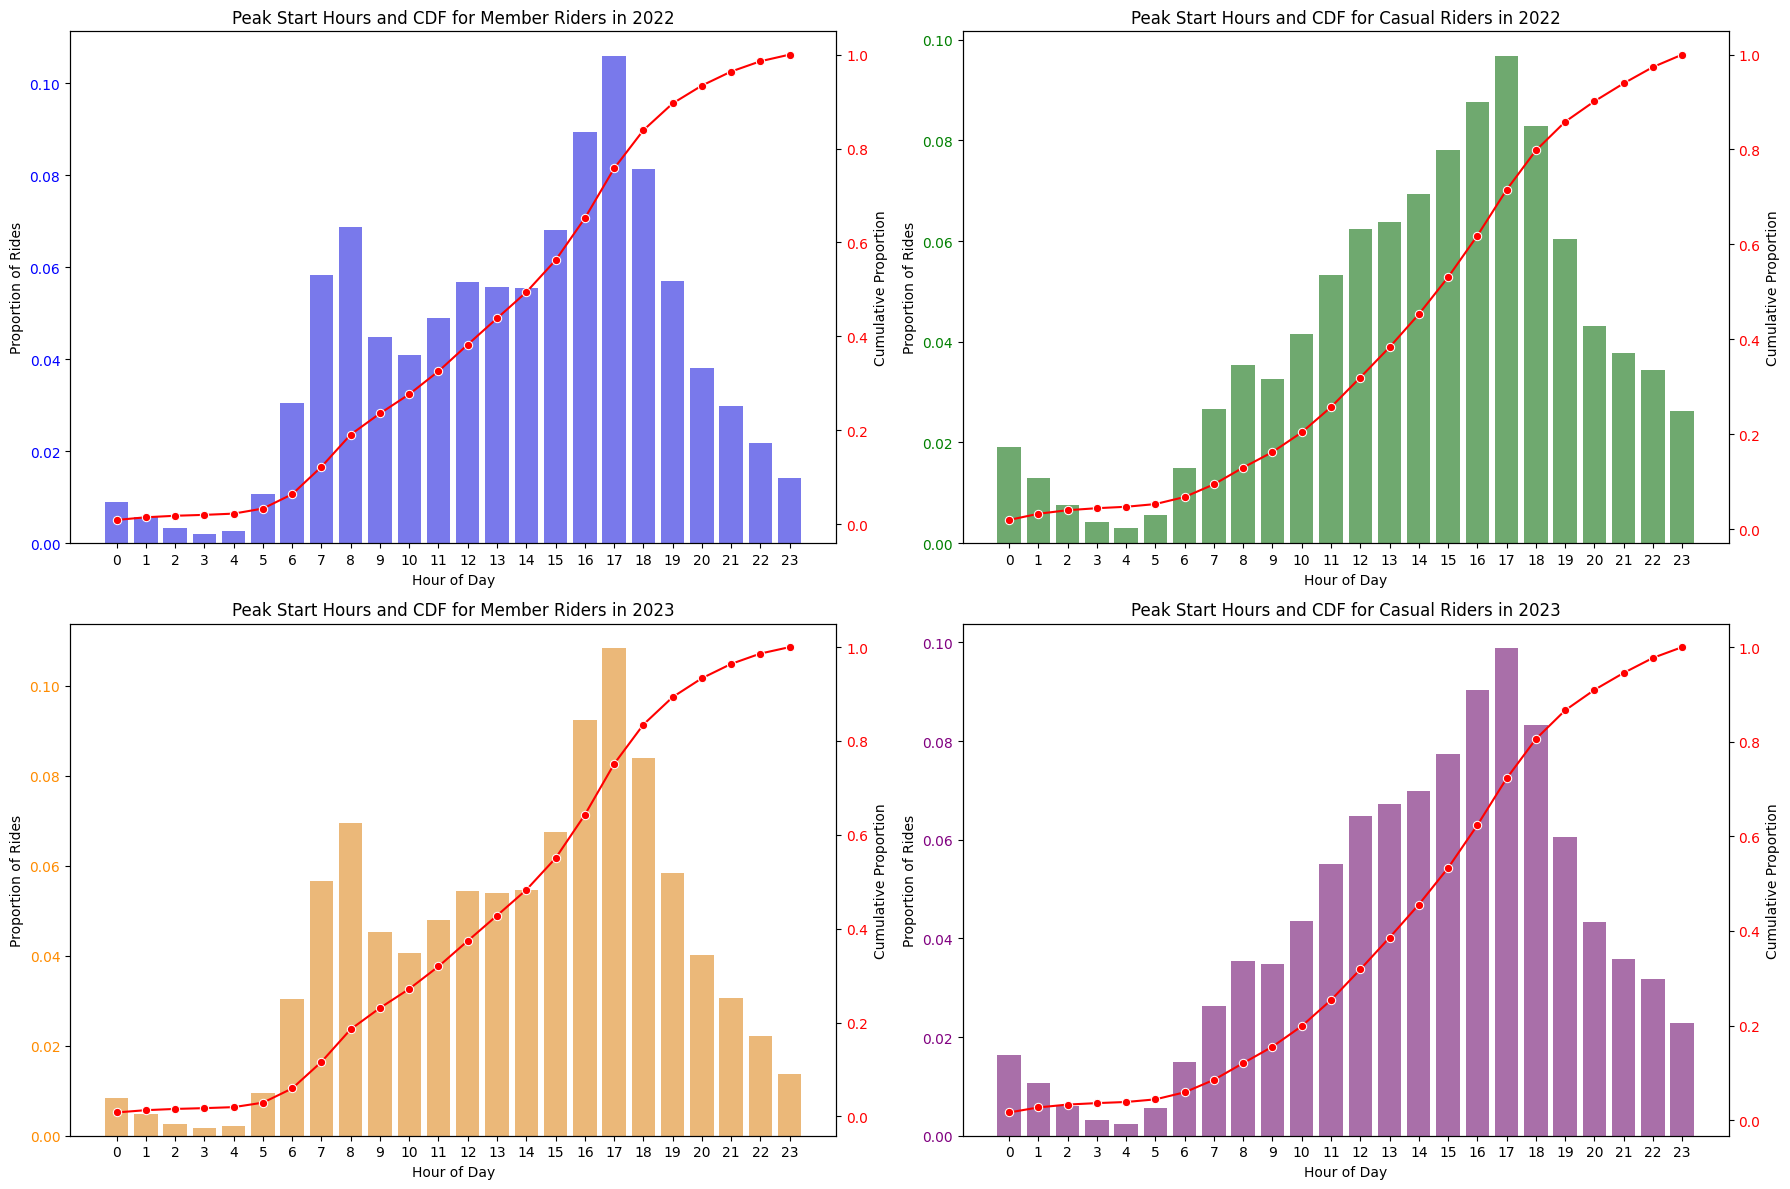

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

def plot_peak_hours_combined(df_dict):
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 rows, 2 columns
    colors = ['blue', 'green', 'darkorange', 'purple']  # Colors for different plots
    ax_idx = 0  # Index to manage which subplot to draw on

    for (user_type, year), df in df_dict.items():
        peak_hours = df['start_hour'].value_counts(normalize=True).sort_index()
        cdf = peak_hours.cumsum()

        # Select the right subplot
        ax1 = axes[ax_idx // 2, ax_idx % 2]
        sns.barplot(x=peak_hours.index, y=peak_hours.values, ax=ax1, alpha=0.6, color=colors[ax_idx])
        ax1.set_title(f'Peak Start Hours and CDF for {user_type} Riders in {year}')
        ax1.set_xlabel('Hour of Day')
        ax1.set_ylabel('Proportion of Rides')
        ax1.tick_params(axis='y', labelcolor=colors[ax_idx])

        # Create a twin axis for the CDF
        ax2 = ax1.twinx()
        sns.lineplot(x=cdf.index, y=cdf.values, ax=ax2, color='red', marker='o', sort=False)
        ax2.set_ylabel('Cumulative Proportion')
        ax2.tick_params(axis='y', labelcolor='red')

        ax_idx += 1

    plt.tight_layout()
    plt.show()

# Example usage with hypothetical dataframes
df_dict = {
    ('Member', '2022'): member_2022,
    ('Casual', '2022'): casual_2022,
    ('Member', '2023'): member_2023,
    ('Casual', '2023'): casual_2023
}
plot_peak_hours_combined(df_dict)
